# Classification Task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=True)
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = np.array(mnist.data)
y= np.array(mnist.target)

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


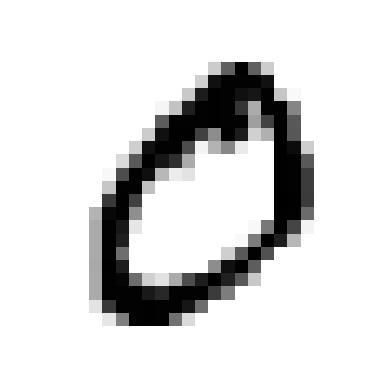

In [4]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[1]
plot_digit(some_digit)
plt.show()

In [7]:
some_digit.shape

(784,)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
y_train_class0 = (y_train == '0')
y_test_class0 = (y_test == '0')

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_class0)

SGDClassifier(random_state=42)

In [13]:
sgd_classifier.predict(some_digit.reshape(1,-1))

array([ True])

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier, X_train, y_train_class0, cv=3)

array([0.9854, 0.9847, 0.9865])

In [15]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_class0, cv=3)
y_train_pred.shape

(60000,)

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_class0, y_train_pred)
cm

array([[53486,   591],
       [  277,  5646]])

In [17]:
from sklearn.metrics import precision_score, recall_score

print("Precision score: " + str(precision_score(y_train_class0, y_train_pred)))
print("Recall score: " + str(recall_score(y_train_class0, y_train_pred)))

Precision score: 0.9052429052429053
Recall score: 0.9532331588721932


In [18]:
cm[1,1]/(cm[1,1] + cm[1,0])

0.9532331588721932

In [19]:
from sklearn.metrics import f1_score

f1_score(y_train_class0, y_train_pred)

0.9286184210526315

In [20]:
some_digit.shape

(784,)

In [21]:
sgd_classifier.decision_function(some_digit.reshape(1,-1))

array([21180.55082734])

In [22]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_class0, method='decision_function', cv=3)

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_class0, y_train_pred)

Recalls and thresholds return an array with one more value than thresholds

In [24]:
threshold = 20000

In [25]:
idx_for_90_precision = (precisions >= 0.90).argmax()

In [26]:
idx_for_90_precision

53716

In [27]:
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

-411.00569077524983

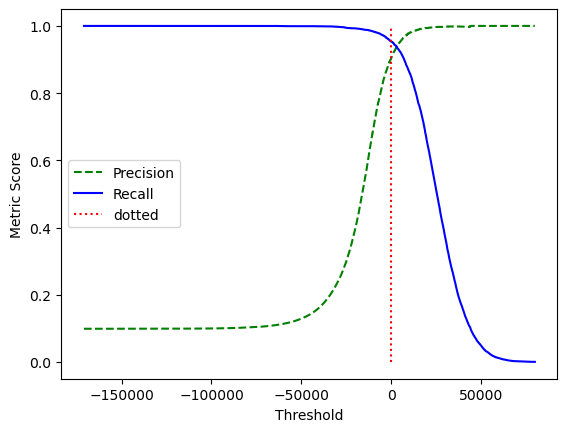

In [28]:
plt.clf()
plt.plot(thresholds, precisions[:-1], "g--", label="Precision")
plt.plot(thresholds, recalls[:-1], "b-", label= "Recall")
plt.vlines(threshold_for_90_precision, 0, 1.0, "r", "dotted", label="dotted")
plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.legend()
plt.show()

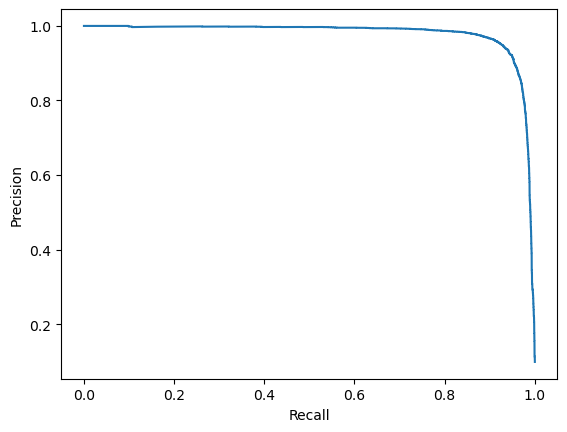

In [29]:
plt.clf()
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_class0, y_train_pred)

thresholds are listed in decreasing order

In [34]:
idx_threshold_90p = (thresholds <= threshold_for_90_precision).argmax()
fpr_at_threshold_90 = fpr[idx_threshold_90p]
tpr_at_threshold_90 = tpr[idx_threshold_90p]

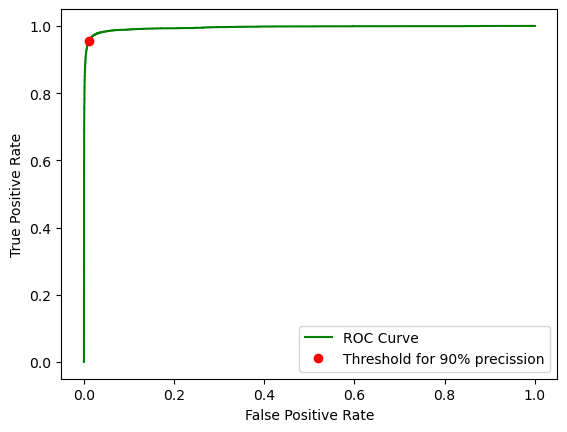

In [35]:
plt.clf()
plt.plot(fpr, tpr, "g-", label="ROC Curve")
plt.plot([fpr_at_threshold_90], [tpr_at_threshold_90], "ro", label="Threshold for 90% precission")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_class0, y_train_pred)

0.9951089652363219

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [38]:
forst_predict_prob = cross_val_predict(forest_clf, X_train, y_train_class0, cv=3, method="predict_proba")

In [40]:
forst_predict_prob[1:3]

array([[0., 1.],
       [1., 0.]])

In [41]:
y_scores_forest = forst_predict_prob[:,1]
precision_forest, recall_forest, thresholds_forest = precision_recall_curve(y_train_class0, y_scores_forest)

[]

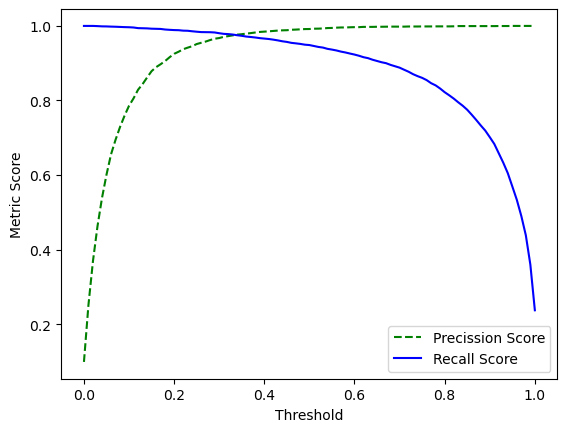

In [42]:
plt.clf()
plt.plot(thresholds_forest, precision_forest[:-1], "g--", label="Precission Score")
plt.plot(thresholds_forest, recall_forest[:-1], "b-", label="Recall Score")
plt.xlabel("Threshold")
plt.ylabel("Metric Score")
plt.legend()
plt.plot()

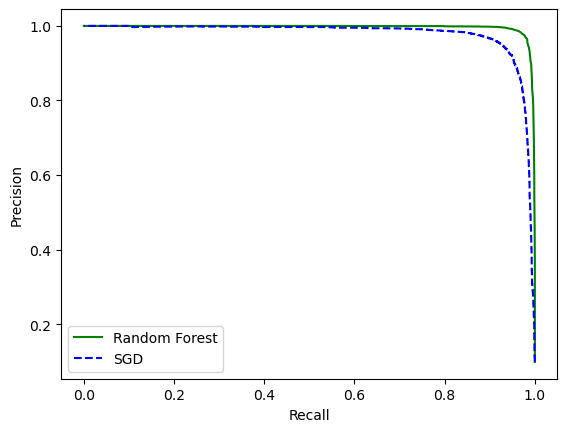

In [43]:
plt.clf()
plt.plot(recall_forest, precision_forest, "g-", label="Random Forest")
plt.plot(recalls, precisions, "b--", label="SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

## Multiclass Classification with Binary Classifiers
### One-versus-one

In [44]:
from sklearn.svm import SVC

In [45]:
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [46]:
svm_clf.predict([X_train[0]])

array(['5'], dtype=object)

In [47]:
first_digit_score = svm_clf.decision_function(X_train[0].reshape(1,-1))

In [48]:
first_digit_score

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [49]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [51]:
y_train[0]

'5'

### One-versus-rest

In [52]:
from sklearn.multiclass import OneVsRestClassifier

In [53]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [54]:
ovr_clf.predict(X_train[0].reshape(1,-1))

array(['5'], dtype='<U1')

In [55]:
first_digit_score = ovr_clf.decision_function(X_train[0].reshape(1,-1))
first_digit_score

array([[-1.32802451, -1.79073853, -1.39262214, -0.94416346, -2.29003973,
         0.80921042, -1.72304481, -1.20954271, -1.63739176, -1.79246052]])

In [56]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train[:2000], y_train[:2000])

SGDClassifier(random_state=42)

In [57]:
first_digit_score = sgd_clf.decision_function(X_train[0].reshape(1,-1))
first_digit_score

array([[-1704540.26918897, -1683382.42678916, -2594122.50571131,
         -145667.7337014 , -3270741.36924448,    -4883.95058744,
        -3420127.24409032, -1846510.16554943, -1328858.01006284,
        -2043246.17459117]])

In [58]:
cross_val_score(sgd_clf, X_train, y_train, scoring="accuracy", cv=3)

array([0.87365, 0.85835, 0.8689 ])

In [59]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)

In [60]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_dict={'alpha':[0.0001, 0.0005, 0.001]}
grid_search = GridSearchCV(sgd_clf, param_dict, scoring="accuracy", cv=3)

In [65]:
import time

In [69]:
start = time.time()
grid_search.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 653.3830616474152s


In [70]:
grid_search.best_params_

{'alpha': 0.0005}

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

start = time.time()
y_train_score = cross_val_score(sgd_clf, X_train_scaled, y_train, scoring="accuracy", cv=3)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 471.577260017395s


In [77]:
y_train_score

array([0.8983, 0.891 , 0.9018])

In [78]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

<Figure size 640x480 with 0 Axes>

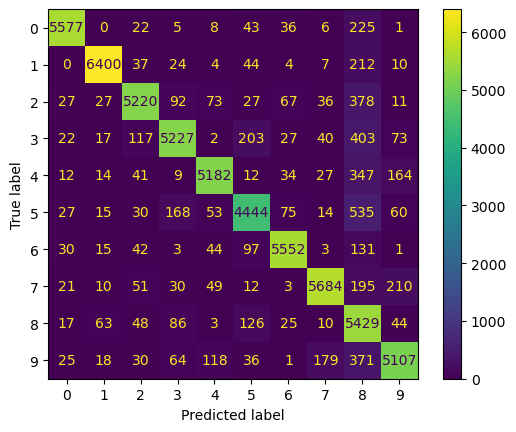

In [79]:
plt.clf()
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

<Figure size 640x480 with 0 Axes>

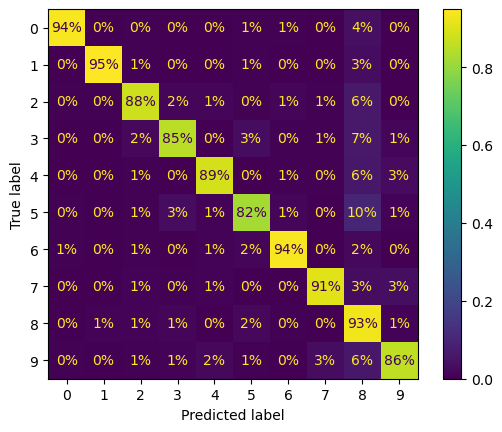

In [89]:
plt.clf()
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format='.0%')
plt.show()

<Figure size 640x480 with 0 Axes>

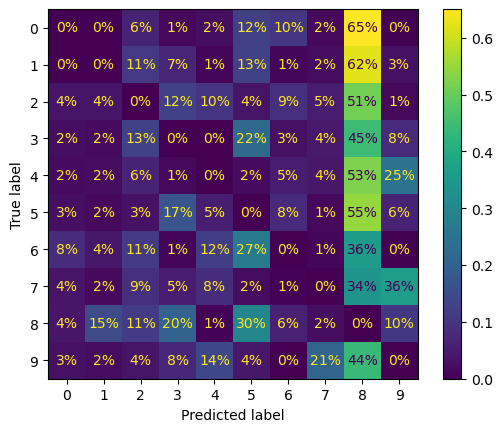

In [88]:
sample_weight = (y_train != y_train_pred)
plt.clf()
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format='.0%', sample_weight=sample_weight)
plt.show()

How to read: % of errors in the true category, were misclassifications as the predicted label

<Figure size 640x480 with 0 Axes>

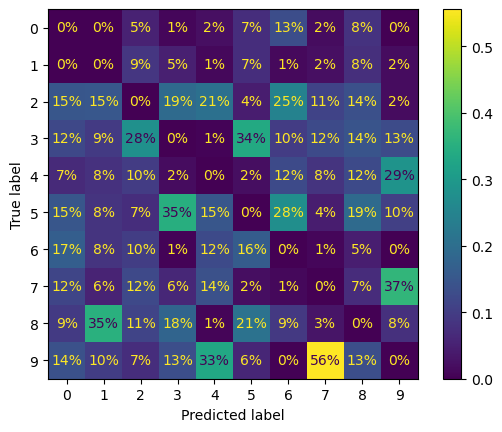

In [87]:
sample_weight = (y_train != y_train_pred)
plt.clf()
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='pred', values_format='.0%', sample_weight=sample_weight)
plt.show()

How to read: % of errors in the predicted category, were actually the true label


In [91]:
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)

In [95]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [96]:
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [100]:
knn_clf.predict(X_train[1].reshape(1,-1))

/Users/juanpablorodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[False, False]])

In [101]:
from sklearn.multioutput import ClassifierChain

In [102]:
chain_clf = ClassifierChain(SVC(), random_state=42, cv=3)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [103]:
chain_clf.predict(X_train[1].reshape(1,-1))

array([[0., 0.]])

## Multilabel Classification

In [11]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
noise.shape

(60000, 784)

In [12]:
X_train_new = X_train + noise
y_train_new = X_train

In [13]:
mo_clf = KNeighborsClassifier()
mo_clf.fit(X_train_new, y_train_new)

KNeighborsClassifier()

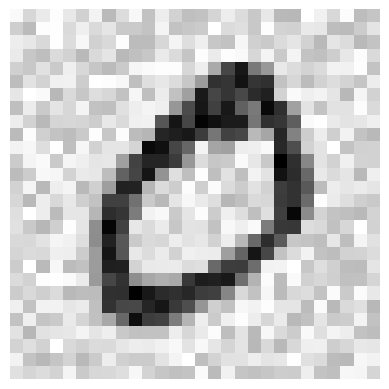

In [14]:
plt.clf()
plot_digit(X_train_new[1])
plt.show()

In [20]:
new_dig = mo_clf.predict(X_train_new[1].reshape(1,-1))

/Users/juanpablorodriguez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


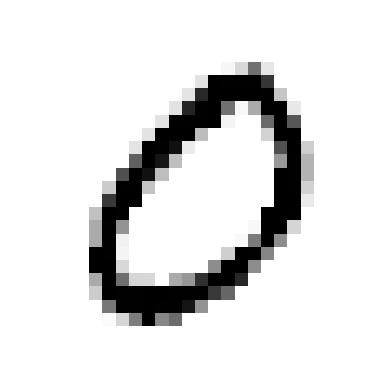

In [21]:
plt.clf()
plot_digit(new_dig)
plt.show()